In [242]:
from selection_detection.dir_path import sample_img_path_name
import os

from PIL import Image, ImageDraw
import numpy as np


In [243]:
ID = 6
RES = 2
SAINOME = 30

In [244]:
img_1 = Image.open(sample_img_path_name(ID, 1))
img_1
print(np.array(img_1).shape)

(82, 868, 4)


In [245]:
img_2 = Image.open(sample_img_path_name(ID, 2))
img_2
print(np.array(img_2).shape)

(82, 868, 4)


In [246]:
def dhash(img):
    gray_img = img.convert('L')
    small_gray_img = gray_img.resize([RES + 1, RES], Image.ANTIALIAS)
#     small_gray_img.resize((64, 64)).save(input_name + '_small_gray.' + input_ext)

    dhash_array = [[] for _ in range(RES)]
    for y in range(0, RES):
        for x in range(0, RES):
            dhash_val = 1 if small_gray_img.getpixel((x, y)) < small_gray_img.getpixel((x + 1, y)) else 0
            dhash_array[y].append(dhash_val)

    return dhash_array

def calc_hamming_distance(dhash1, dhash2):
    distance = 0
    for y in range(len(dhash1)):
        for x in range(len(dhash2)):
            if dhash1[y][x] != dhash2[y][x]:
                distance += 1
    return distance


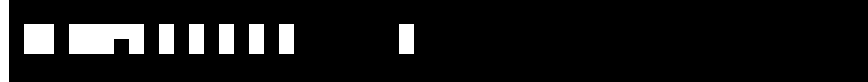

In [247]:
crop_1_list = []
ad_x_1 = -6
ad_y_1 = -21

img_hash_1 = Image.new('RGB', (868, 82))
for i in range(ad_x_1,82,SAINOME):
    for j in range(ad_y_1,868,SAINOME):
        box = (j, i, j+SAINOME, i+SAINOME)
        crop_1_list.append(img_1.crop(box))
        hash_1 = dhash(img_1.crop(box))
        bi_img = Image.fromarray((np.matrix(hash_1) * 255).astype('uint8'), 'L').resize((SAINOME, SAINOME))
        img_hash_1.paste(bi_img, box)


img_hash_1



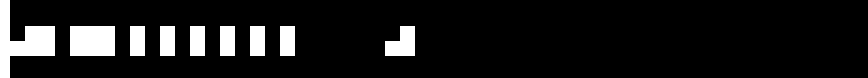

In [248]:
crop_2_list = []
ad_x_2 = -4
ad_y_2 = -20

img_hash_2 = Image.new('RGB', (868, 78))
for i in range(ad_x_2,78,SAINOME):
    for j in range(ad_y_2,868,SAINOME):
        
        box = (j, i, j+SAINOME, i+SAINOME)
        crop_2_list.append(img_2.crop(box))
        hash_2 = dhash(img_2.crop(box))
        bi_img = Image.fromarray((np.matrix(hash_2) * 255).astype('uint8'), 'L').resize((SAINOME, SAINOME))
        img_hash_2.paste(bi_img, box)
img_hash_2

In [249]:
distance_list = [calc_hamming_distance(dhash(crop_1), dhash(crop_2)) for crop_1, crop_2 in zip(crop_1_list, crop_2_list)]

distance_arr = np.array(distance_list)
distance_arr = distance_arr.reshape((3,30))
print(distance_arr)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


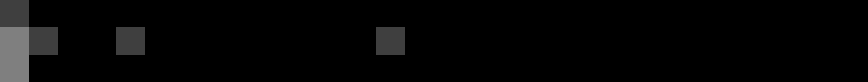

In [253]:
result = Image.fromarray((np.matrix(distance_arr)/4 * 255).astype('uint8'), 'L').resize((868, 82))
result

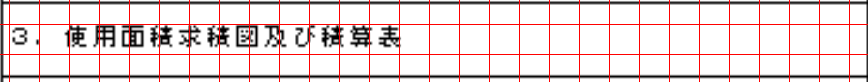

In [251]:
# new_img1 = Image.new('RGB', (868,82), (255,255,255)) # 200x200の大きさの背景
draw_1 = ImageDraw.Draw(img_1)
draw_2 = ImageDraw.Draw(img_2)

for i in range(ad_x_1,82,SAINOME):
    draw_1.line((0,i,868,i), fill=(255,0,0))

for i in range(ad_x_2,82,SAINOME):
    draw_2.line((0,i,868,i), fill=(255,0,0))
    
for j in range(ad_y_1,868,SAINOME):
    draw_1.line((j,0,j,82), fill=(255,0,0))

for j in range(ad_y_2,868,SAINOME):
    draw_2.line((j,0,j,82), fill=(255,0,0))

img_1


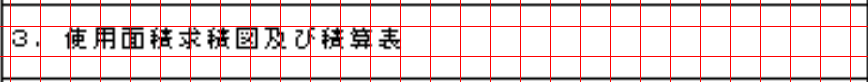

In [252]:
img_2